## 1. Fancier Optimization

### 1) Problems with SGD
* SGD는 미니 배치에서 데이터 loss를 계산하고, gradient의 반대 방향으로 파라미터를 업데이트 하는 방법  
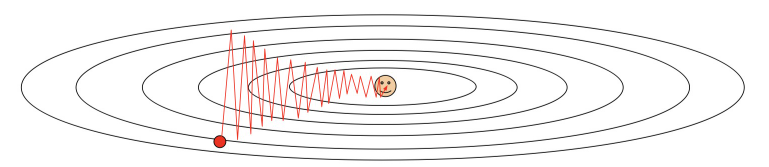
* 지그재그 방향으로 loss가 최소인 점을 찾아가므로 convergence가 매우 느림
* loss 함수에 local minima나 saddle point가 있는 경우 gradient descent가 멈춰버림  
    * 고차원에서는 saddle point가 더 일반적으로 일어남

### 2) SGD + Momentum
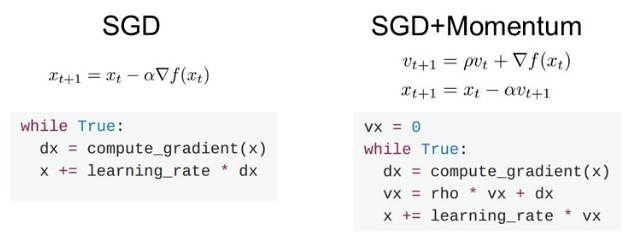
* SGD에서는 X를 직접 연산식에 포함하는 반면 momentum에서는 속도 변수 vx 도입  
* gradinet를 계산할 때 gradient 방향과 velocity를 모두 고려  
* rho는 friction과 같아 velocity가 너무 커지지 않도록 마찰을 주는 것임(보통 0.9나 0.99로 설정)  
* 모멘텀을 추가함으로써 노이즈가 평균화되어 더 매끄러워짐  

### 3) Nesterov Momentum
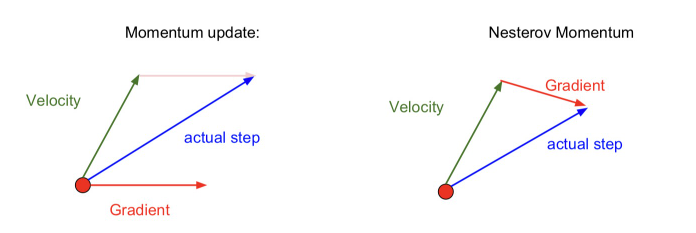
* Nesterov Momentum은 gradient step을 계산하기 전에 momentum step을 미리 고려하는 방법  
* 시작점을 momentum step의 종료점으로 변경한 다음 gradient step을 evaluate하는 방법  
* NAG Nesterov Accelerated Gradient라고도 함  
* Nesterov Momentum은 그냥 momentum보다 항상 convergence rate이 좋음(convex에서만)

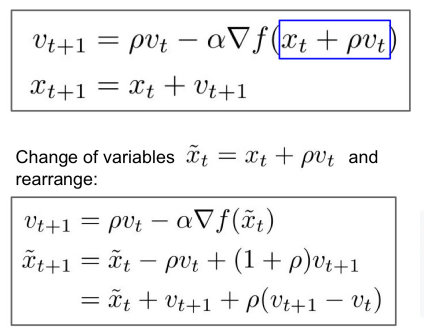
* 파란색 박스가 기존 momentum과 유일하게 다른 부분  
* 미리 velocity 방향을 예측해서 gradient를 구함  
* non-convex 그래프가 더 많은 neural network에서는 성능이 별로 좋지 않아 잘 쓰이지 않음  

### 3) AdaGrad
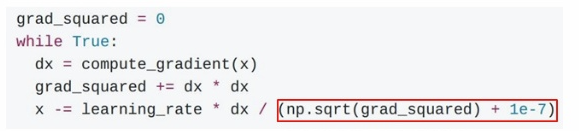
* per-parameter adaptive learning rate method로서 각 매개변수에 맞춤으로 update하는 방법  
* grad squared를 구해서 이를 나눠줌  
* step을 진행할수록 분모가 커져서 X가 작아짐
    * 처음은 빠른 속도로 접근했다가 점차 속도가 느려지고 학습이 종료되는 문제가 있음  
    * 이 문제를 해결하기 위해 나온 것이 RMSProp  

### 4) RMSProp
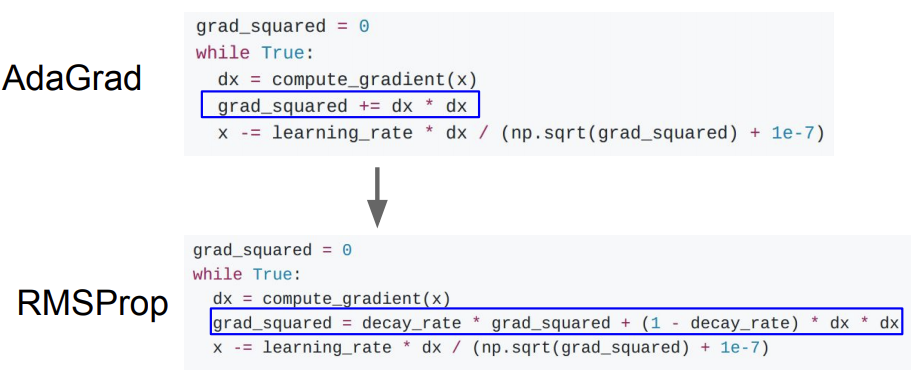
* AdaGrad에서 decay rate 개념을 도입  
* 누적된 gradient 제곱항에 decay rate을 곱해주고, 현재 gradient의 제곱항에는 (1-decay rate)을 곱해줌  
    * 이를 통해 AdaGrad와 비슷하게 속도 조절이 가능함  
    * 보통 decay_rate은 0.9 혹은 0.99를 이용  

### 5) Adam
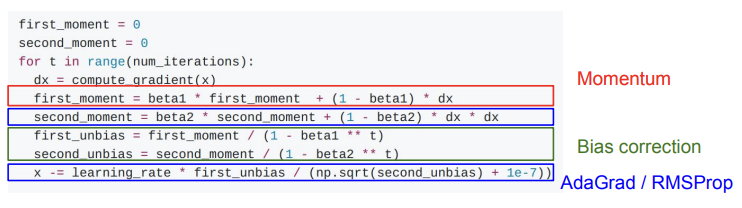
* momentum과 RMSProp 사이에 first moment와 second moment가 너무 작아지지 않게 하기 위해 bias correction 항을 추가  
* Adam with beta1=0.9, beta2=0.999, learning_rate=1e-3 or 5e-4면 아주 좋음!  

### 6) learning rate decay
* SGD, SGD+Momentum, Adagrad, RMSProp, Adam 모두 하이퍼파라미터 learning rate을 필요로 함  
    * 모두 1차 미분을 활용한 first order optimization method   
* **learning rate decay**개념을 도입한다!!!
* 처음에는 빠르게 convergence가 일어나므로 큰 learning rate을 적용하고 서서히 learning rate decay를 적용함으로써 그 값을 작게 만들어서 적용해줌  
    * step decay  
    * exponential decay => 이 방법이 제일 많이 쓰임  
    *  1/t decay
    
#### second-order optimization
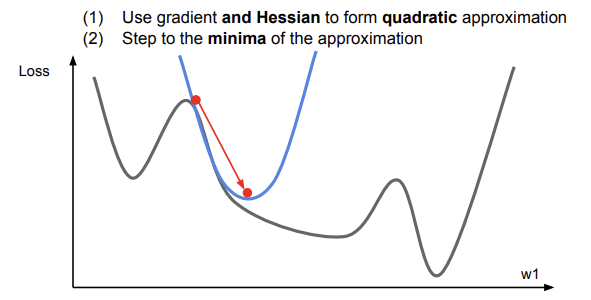
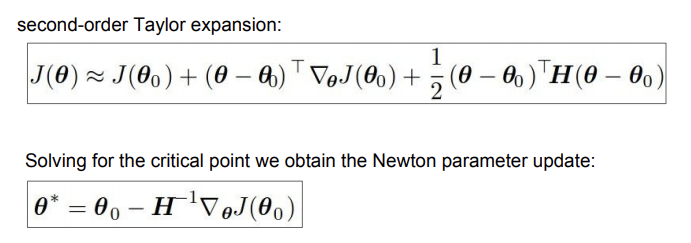

* Hessian을 도입함으로써 convergence가 매우 빨라지고, learning rate과 같은 hyperparameter가 필요 없게 됨  
* 하지만 딥러닝에서는 잘 사용하지 안 함!! Hessian은 nxn 행렬인데 딥러닝 파라미터 수가 몇 백개만 넘어가도 연산이 매우 힘들어짐  
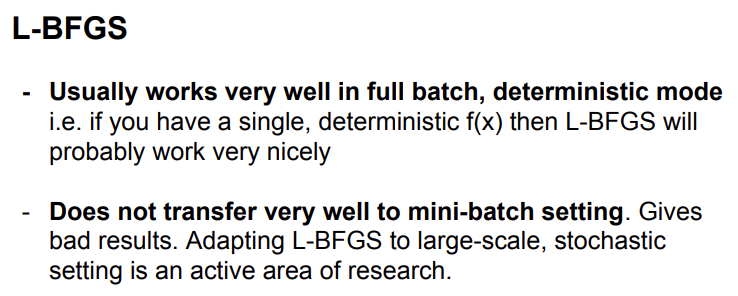

#### 실전에서는...
- Adam이 좋은 default choic  
- full batch이고 stochastic, parameter이 적다면 L-BFGS도 좋은 선택  

### 7) Model Ensemble
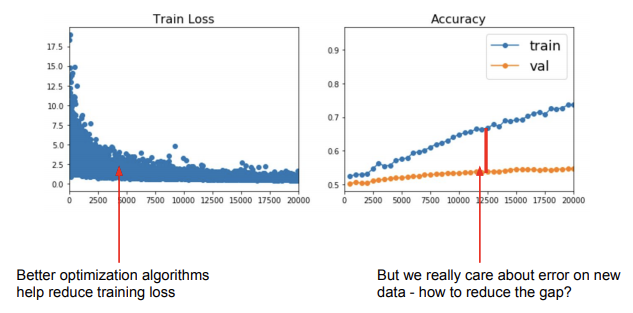
* loss를 줄이면서 동시에 train과 val accuracy의 갭을 줄여야 함 => 갭을 줄이기 위해 사용하는 가장 간단하고 빠른 방법이 바로 앙상블(Ensemble)  
    1. train multiple independent models
    2. at test time average their results  
    여러 개의 모델을 만들고 이들의 평균을 이용하는 방법이다

#### more tips and tricks
* 모델을 독립적으로 학습시키는 방법이 아닌 학습 도중 중간 모델들을 저장(snapshot)하고 앙상블로 사용하는 방법 => test할 때는 여러 snapshoots의 예측값들의 평균을 사용  

## 2. Regularization

### 1) Dropout
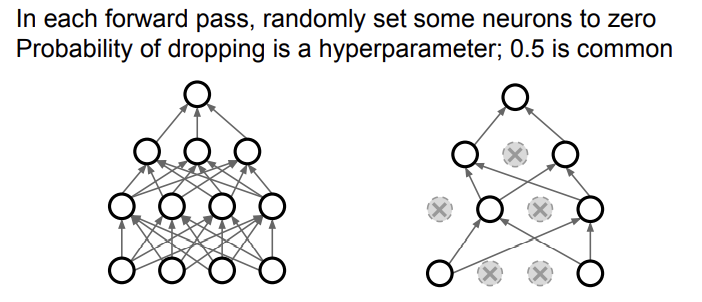
* 특정 노트를 랜덤하게 꺼버리는 방법 => forward pass에서 특정 뉴런의 활성화 값을 0으로 만들어 버림  
* feature 간의 상호작용을 방지함으로써 다양한 featrue 값들이 골고루 사용될 수 있도록 함 => overfitting 방지
* 단일 모델로 앙상블 효과를 가질 수 있음  
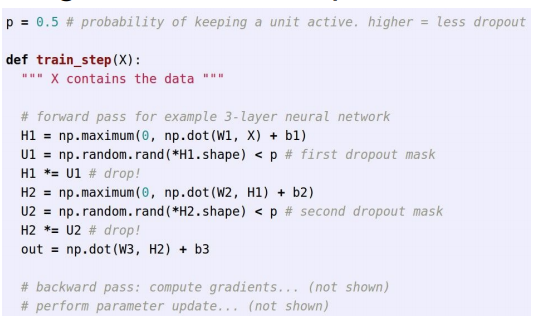
* example forward pass with a 3-layer network using dropout

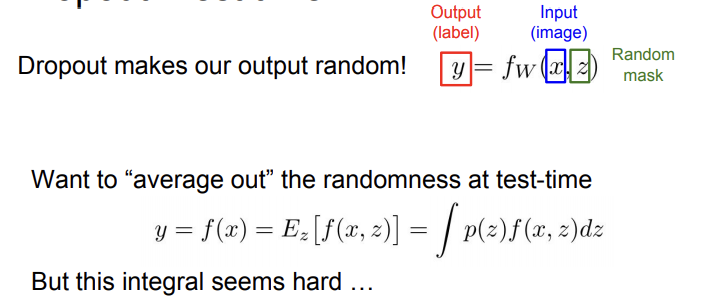
* 함수에 z(random mask)가 추가됨  
* 이미 학습된 네트워크의 test time에 임의성을 부여하는 건 적절하지 않으므로 randomness를 average out시킴  
* 적분하기가 어려워 샘플링을 통해 적분을 근사시키는 방법을 이용함

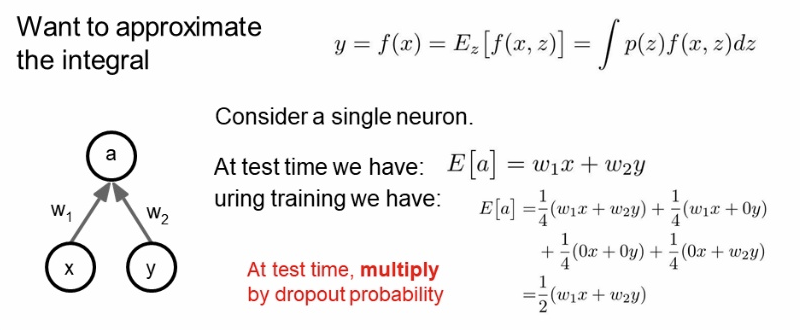
* test time의 기댓값이 train time의 절반밖에 되지 않으므로 네트워크의 출력값에 **dropout probability**(0.5)를 곱해줘야 함  
* dropout을 사용하면 학습 시간이 길어지지만, test data에 잘 일반화할 수 있는 모델을 만들 수 있음  

### 2) Batch normalization

### 3) Data Augmentation
* horizontal flips
* random crops and scales
* color jitter
    * randomize contrast and brightness
학습시킬 때 이미지를 계속 바꿔주면서 학습을 시키면 regularization의 효과를 얻을 수 있음

## 3. Transfer Learning
* 전이학습은 CNN에서 모델을 학습시킬 때 데이터가 많이 필요할 것이라는 편견을 깬 아이디어  
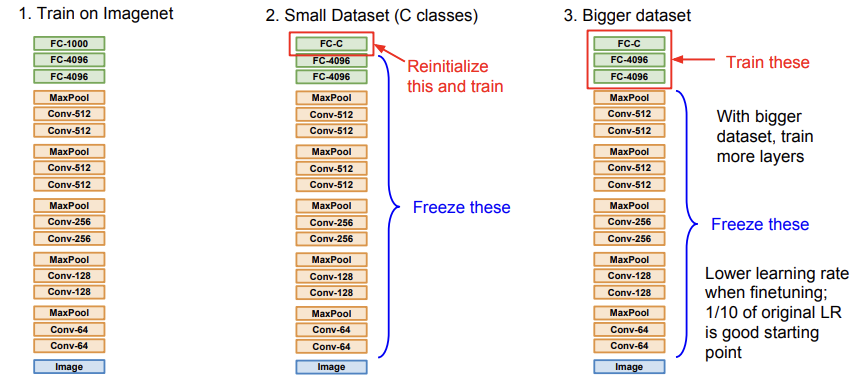
* CNN layer에서 ImageNet과 같은 큰 데이터셋으로 학습시킴  
* 훈련된 모델을 우리가 가진 작은 데이터셋에 적용  
* 이미 정의한 가중치 행렬을 초기화시키고 나머지 layer들의 가중치는 freeze시킴(초기화한 layer만 재사용하는 것)  
* learning rate을 조금 낮춰서 finetuning 해주면 좋음  